# Week 4
# Aidin Attar - 2048654

### Table of contents:
- [Libraries](#lib)
- [Exercise 1 - Community Mobility Open Data](#ex1)
- [Exercise 2 - Random Number Generators](#ex2)
- [Exercise 3 - Bayesian Inference - Part 1](#ex3)
- [Exercise 4 - Bayesian Inference - Part 2](#ex4)

## Library<a class="anchor" id="lib"></a>

In [1]:
# import some useful packages
library("tidyr")
library("dplyr")
library("ggplot2")
library("zoo")
library("repr")
library("tibble")
library("tidyverse")
library("grid")
library("gridExtra")
library("ggthemes")
library("ggtext")

library("IRdisplay")
library("lubridate")


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v readr   2.1.2     v stringr 1.4.0
v purrr   0.3.4     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




## Exercise 1 - Community Mobility Open Data<a class="anchor" id="ex1"></a>

In [2]:
dir    <- "DATA"
URL    <- "https://www.gstatic.com/covid19/mobility"
fname  <- "Global_Mobility_Report.csv"
target <- paste(URL, fname, sep="/")
#download.file(target, destfile=paste(dir, fname, sep="/"), method='curl')

mobility <- read_csv(file = paste(dir, fname, sep="/"))
mobility

Rows: 9632380 Columns: 15
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (8): country_region_code, country_region, sub_region_1, sub_region_2, m...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-21,-3,2,6,0,-1,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-22,-2,2,4,-2,3,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-23,-1,3,3,-1,4,1


In [3]:
URL    <- "https://www.gstatic.com/covid19/mobility"
fname  <- "Region_Mobility_Report_CSVs.zip"
target <- paste(URL, fname, sep="/")
#download.file(target, destfile=paste(dir, fname, sep="/"), method='curl')

#unzip(paste(dir,fname,sep="/"), exdir=dir)

#fname   <- "2020_UA_Region_Mobility_Report.csv"
#ukraine <- read_csv(file = paste(dir, fname, sep="/"))

#fname   <- "2020_BA_Region_Mobility_Report.csv"
#bosnia  <- read_csv(file = paste(dir, fname, sep="/"))

ukraine <- filter(mobility, country_region=="Ukraine")
bosnia  <- filter(mobility, country_region=="Bosnia and Herzegovina")

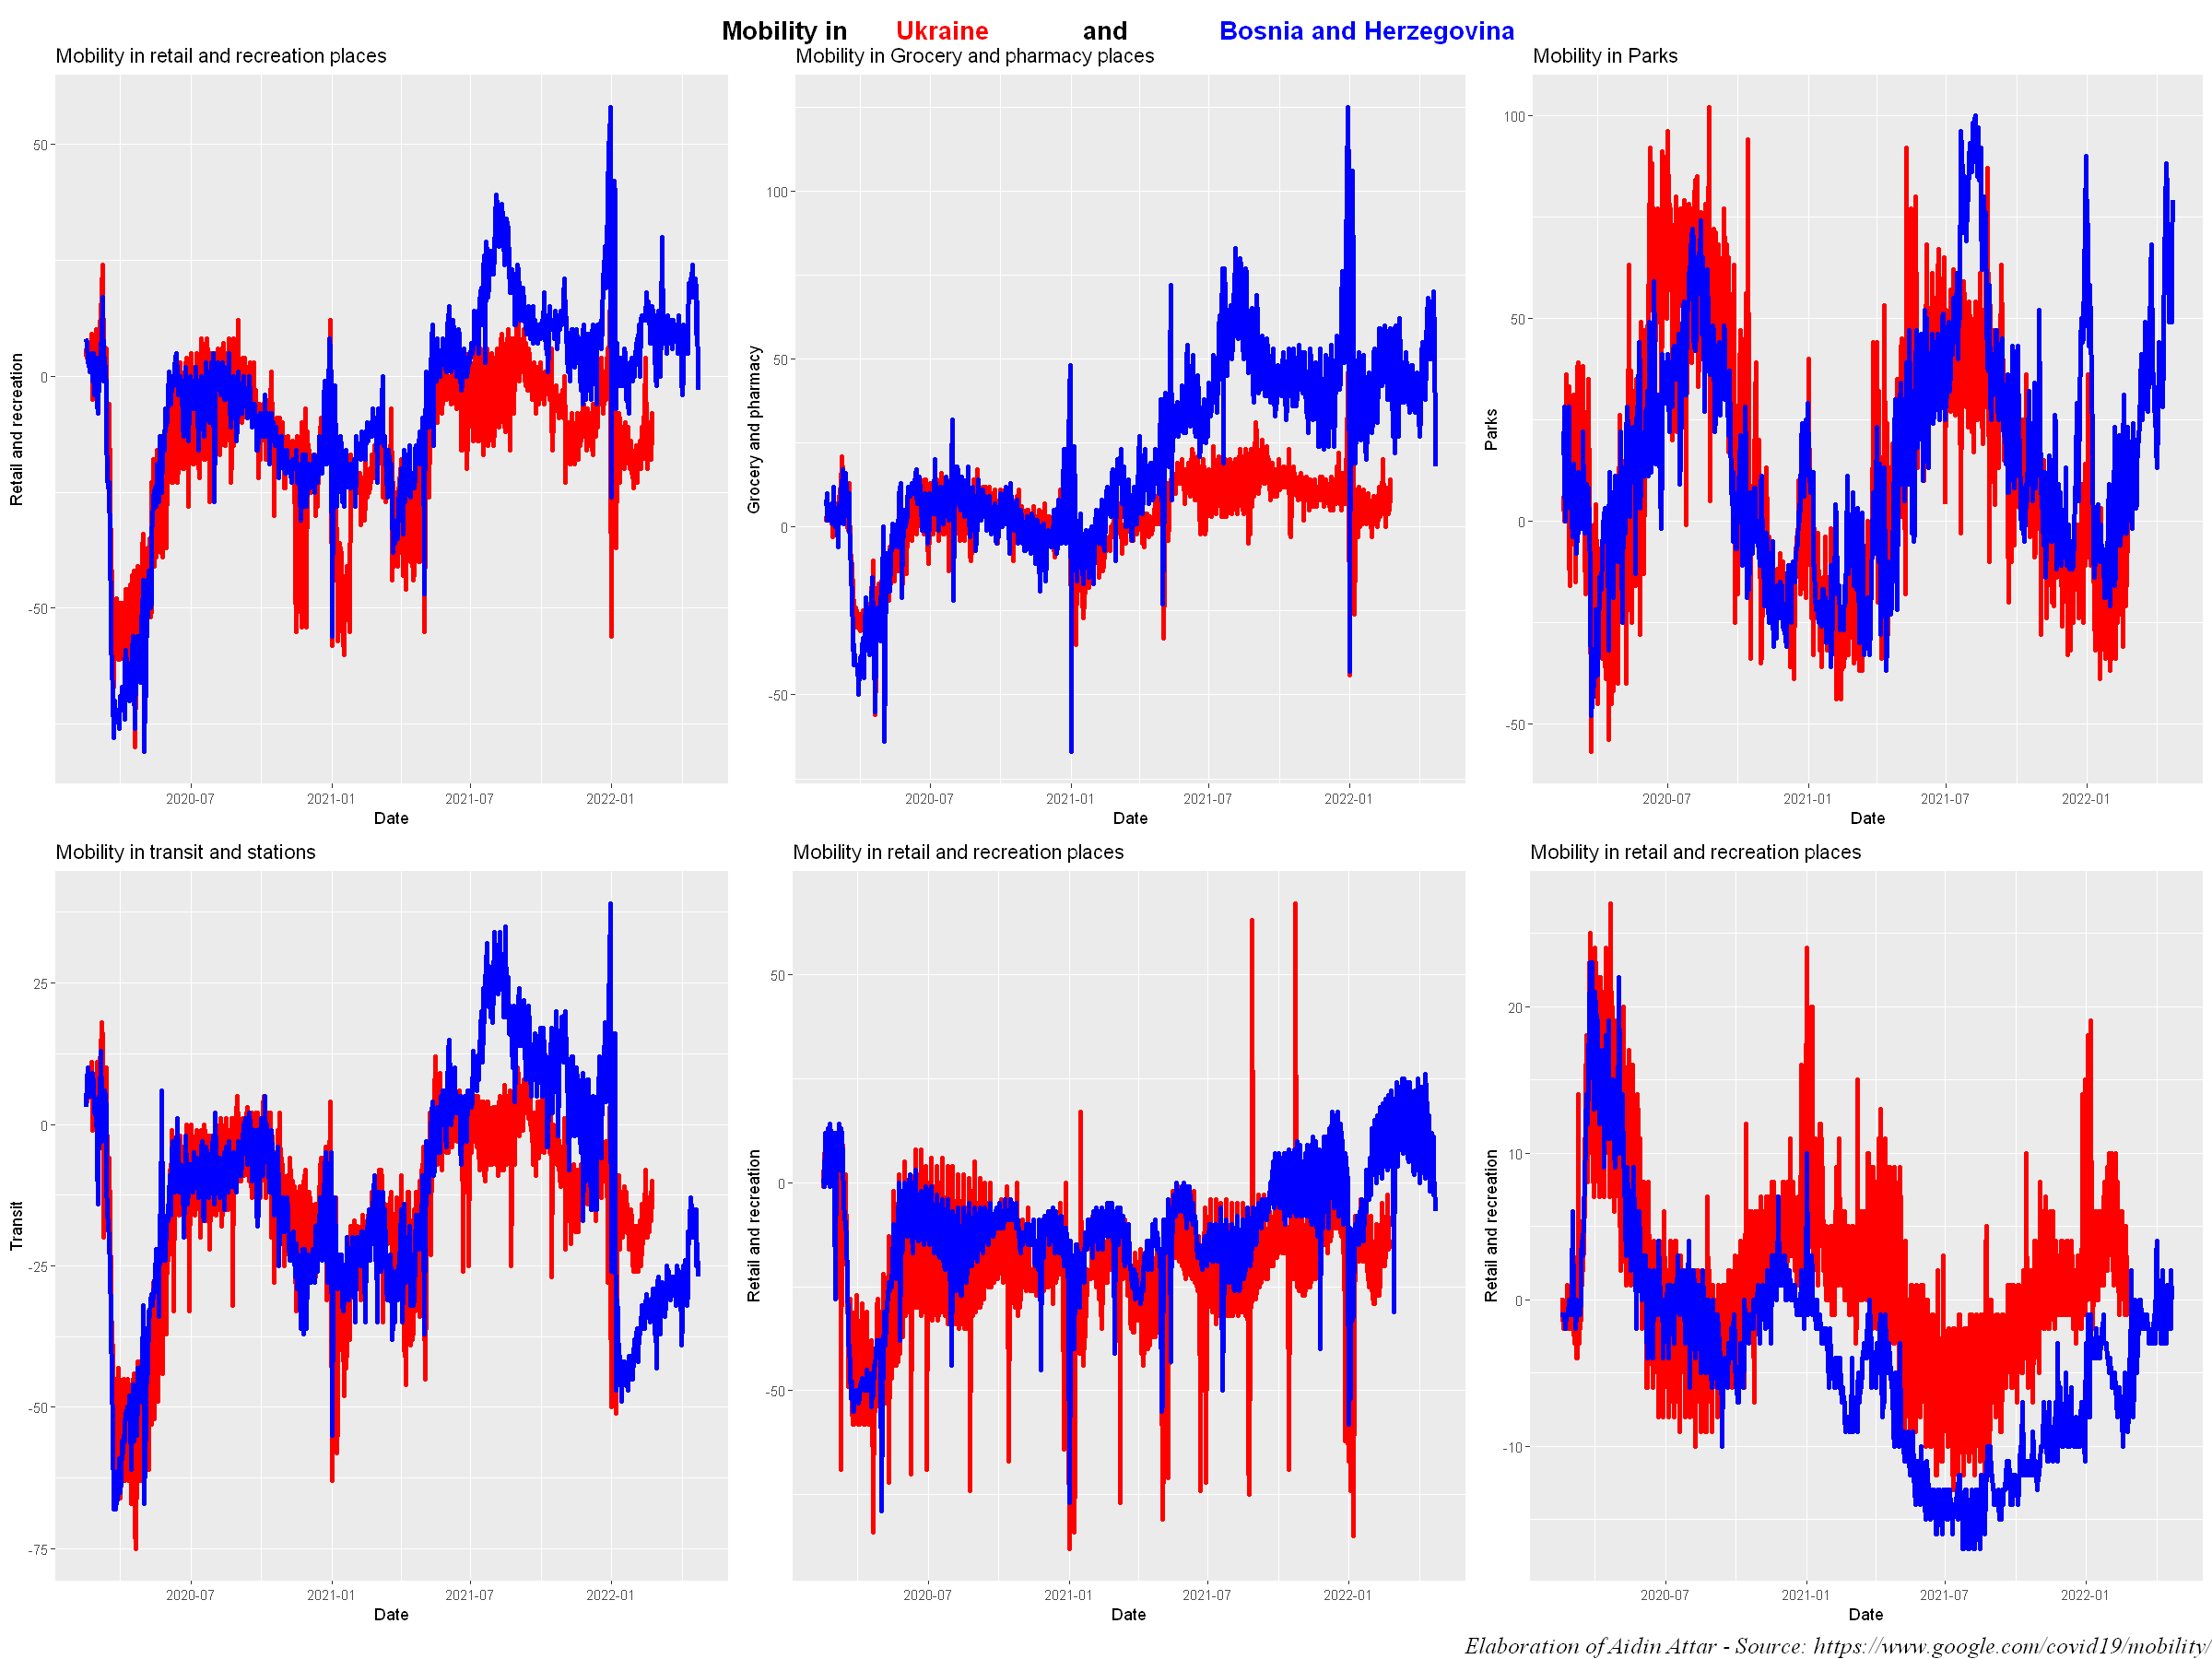

In [4]:
options(repr.plot.width=20, repr.plot.height=15)
p1 <- ggplot()
p1 <- p1 + geom_line(data = ukraine, aes(date, retail_and_recreation_percent_change_from_baseline), color="red",  size=1.5)
p1 <- p1 + geom_line(data = bosnia,  aes(date, retail_and_recreation_percent_change_from_baseline), color="blue", size=1.5)
p1 <- p1 + labs(x        = "Date",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")


p2 <- ggplot()
p2 <- p2 + geom_line(data = ukraine, aes(date, grocery_and_pharmacy_percent_change_from_baseline), color="red",  size=1.5)
p2 <- p2 + geom_line(data = bosnia,  aes(date, grocery_and_pharmacy_percent_change_from_baseline), color="blue", size=1.5)
p2 <- p2 + labs(x        = "Date",
                y        = "Grocery and pharmacy",
                title    = "Mobility in Grocery and pharmacy places")


p3 <- ggplot()
p3 <- p3 + geom_line(data = ukraine, aes(date, parks_percent_change_from_baseline), color="red",  size=1.5)
p3 <- p3 + geom_line(data = bosnia,  aes(date, parks_percent_change_from_baseline), color="blue", size=1.5)
p3 <- p3 + labs(x        = "Date",
                y        = "Parks",
                title    = "Mobility in Parks")


p4 <- ggplot()
p4 <- p4 + geom_line(data = ukraine, aes(date, transit_stations_percent_change_from_baseline), color="red",  size=1.5)
p4 <- p4 + geom_line(data = bosnia,  aes(date, transit_stations_percent_change_from_baseline), color="blue", size=1.5)
p4 <- p4 + labs(x        = "Date",
                y        = "Transit",
                title    = "Mobility in transit and stations")



p5 <- ggplot()
p5 <- p5 + geom_line(data = ukraine, aes(date, workplaces_percent_change_from_baseline), color="red",  size=1.5)
p5 <- p5 + geom_line(data = bosnia,  aes(date, workplaces_percent_change_from_baseline), color="blue", size=1.5)
p5 <- p5 + labs(x        = "Date",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")



p6 <- ggplot()
p6 <- p6 + geom_line(data = ukraine, aes(date, residential_percent_change_from_baseline), color="red",  size=1.5)
p6 <- p6 + geom_line(data = bosnia,  aes(date, residential_percent_change_from_baseline), color="blue", size=1.5)
p6 <- p6 + labs(x        = "Date",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")

grid.arrange(p1, p2, p3, p4, p5, p6, 
             nrow = 2,
             top=textGrob("", gp = gpar(fontface = 8, fontsize = 25),hjust = 1,x = 1),
             bottom = textGrob("Elaboration of Aidin Attar - Source: https://www.google.com/covid19/mobility/", gp = gpar(fontface = 8, fontsize = 15),hjust = 1,x = 1))

spacing  <- 20
grid.text(0.425, unit(1,"npc") - unit(1,"line"), 
          label=paste("Mobility in ",paste(rep(" ",spacing*2), collapse='')),
          gp=gpar(col="black", fontsize=16,fontface="bold"))
grid.text(0.495, unit(1,"npc") - unit(1,"line"), 
          label=paste("Ukraine",paste(rep(" ",spacing*2), collapse='')),
          gp=gpar(col="red", fontsize=16,fontface="bold"))
grid.text(0.5, unit(1,"npc") - unit(1,"line"), 
          label=paste(paste(rep(" ",spacing), collapse='')," and ",
            paste(rep(" ",spacing), collapse='')),
          gp=gpar(col="black", fontsize=16,fontface="bold"))
grid.text(0.55, unit(1,"npc") - unit(1,"line"), 
          label=paste(paste(rep(" ",spacing*2), collapse=''),"Bosnia and Herzegovina"),
          gp=gpar(col="blue", fontsize=16,fontface="bold"))

In [5]:
#round dates down to week
mobility$week  <- floor_date(mobility$date,  "week")
mobility$month <- floor_date(mobility$date, "month")

ukraine_tot <- filter(mobility, country_region=="Ukraine")
bosnia_tot  <- filter(mobility, country_region=="Bosnia and Herzegovina")

#find mean mobility by week
ukraine_week <- ukraine_tot %>% group_by(week) %>% summarise(retail_and_recreation_percent_change_from_baseline = mean(retail_and_recreation_percent_change_from_baseline),
                                                                        grocery_and_pharmacy_percent_change_from_baseline  = mean( grocery_and_pharmacy_percent_change_from_baseline),
                                                                        parks_percent_change_from_baseline                 = mean(                parks_percent_change_from_baseline),
                                                                        transit_stations_percent_change_from_baseline      = mean(     transit_stations_percent_change_from_baseline),
                                                                        workplaces_percent_change_from_baseline            = mean(           workplaces_percent_change_from_baseline),
                                                                        residential_percent_change_from_baseline           = mean(          residential_percent_change_from_baseline))

bosnia_week <- bosnia_tot %>% group_by(week) %>% summarise(retail_and_recreation_percent_change_from_baseline = mean(retail_and_recreation_percent_change_from_baseline),
                                                                        grocery_and_pharmacy_percent_change_from_baseline  = mean( grocery_and_pharmacy_percent_change_from_baseline),
                                                                        parks_percent_change_from_baseline                 = mean(                parks_percent_change_from_baseline),
                                                                        transit_stations_percent_change_from_baseline      = mean(     transit_stations_percent_change_from_baseline),
                                                                        workplaces_percent_change_from_baseline            = mean(           workplaces_percent_change_from_baseline),
                                                                        residential_percent_change_from_baseline           = mean(          residential_percent_change_from_baseline))


#find mean mobility by month
ukraine_month <- ukraine_tot %>% group_by(month) %>% summarise(retail_and_recreation_percent_change_from_baseline = mean(retail_and_recreation_percent_change_from_baseline),
                                                                        grocery_and_pharmacy_percent_change_from_baseline  = mean( grocery_and_pharmacy_percent_change_from_baseline),
                                                                        parks_percent_change_from_baseline                 = mean(                parks_percent_change_from_baseline),
                                                                        transit_stations_percent_change_from_baseline      = mean(     transit_stations_percent_change_from_baseline),
                                                                        workplaces_percent_change_from_baseline            = mean(           workplaces_percent_change_from_baseline),
                                                                        residential_percent_change_from_baseline           = mean(          residential_percent_change_from_baseline))

bosnia_month <- bosnia_tot %>% group_by(month) %>% summarise(retail_and_recreation_percent_change_from_baseline = mean(retail_and_recreation_percent_change_from_baseline),
                                                                        grocery_and_pharmacy_percent_change_from_baseline  = mean( grocery_and_pharmacy_percent_change_from_baseline),
                                                                        parks_percent_change_from_baseline                 = mean(                parks_percent_change_from_baseline),
                                                                        transit_stations_percent_change_from_baseline      = mean(     transit_stations_percent_change_from_baseline),
                                                                        workplaces_percent_change_from_baseline            = mean(           workplaces_percent_change_from_baseline),
                                                                        residential_percent_change_from_baseline           = mean(          residential_percent_change_from_baseline))

bosnia_week

week,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-02-09,8.0000000,6.000000,16.0000000,3.0000000,1.000000,-1.0000000
2020-02-16,3.5714286,4.428571,12.5714286,6.8571429,7.285714,-1.1428571
2020-02-23,0.1428571,3.571429,5.4285714,3.5714286,7.714286,-0.7142857
2020-03-01,0.8571429,4.714286,0.1428571,0.4285714,2.285714,0.4285714
2020-03-08,-2.1428571,10.857143,5.1428571,-0.5714286,2.857143,0.4285714
2020-03-15,-46.2857143,-8.428571,2.2857143,-33.2857143,-29.142857,9.4285714
2020-03-22,-73.2857143,-41.000000,-40.4285714,-66.1428571,-52.285714,20.2857143
2020-03-29,-70.0000000,-40.142857,-23.4285714,-59.5714286,-50.571429,18.0000000
2020-04-05,-64.0000000,-29.857143,-4.1428571,-52.1428571,-48.285714,15.0000000


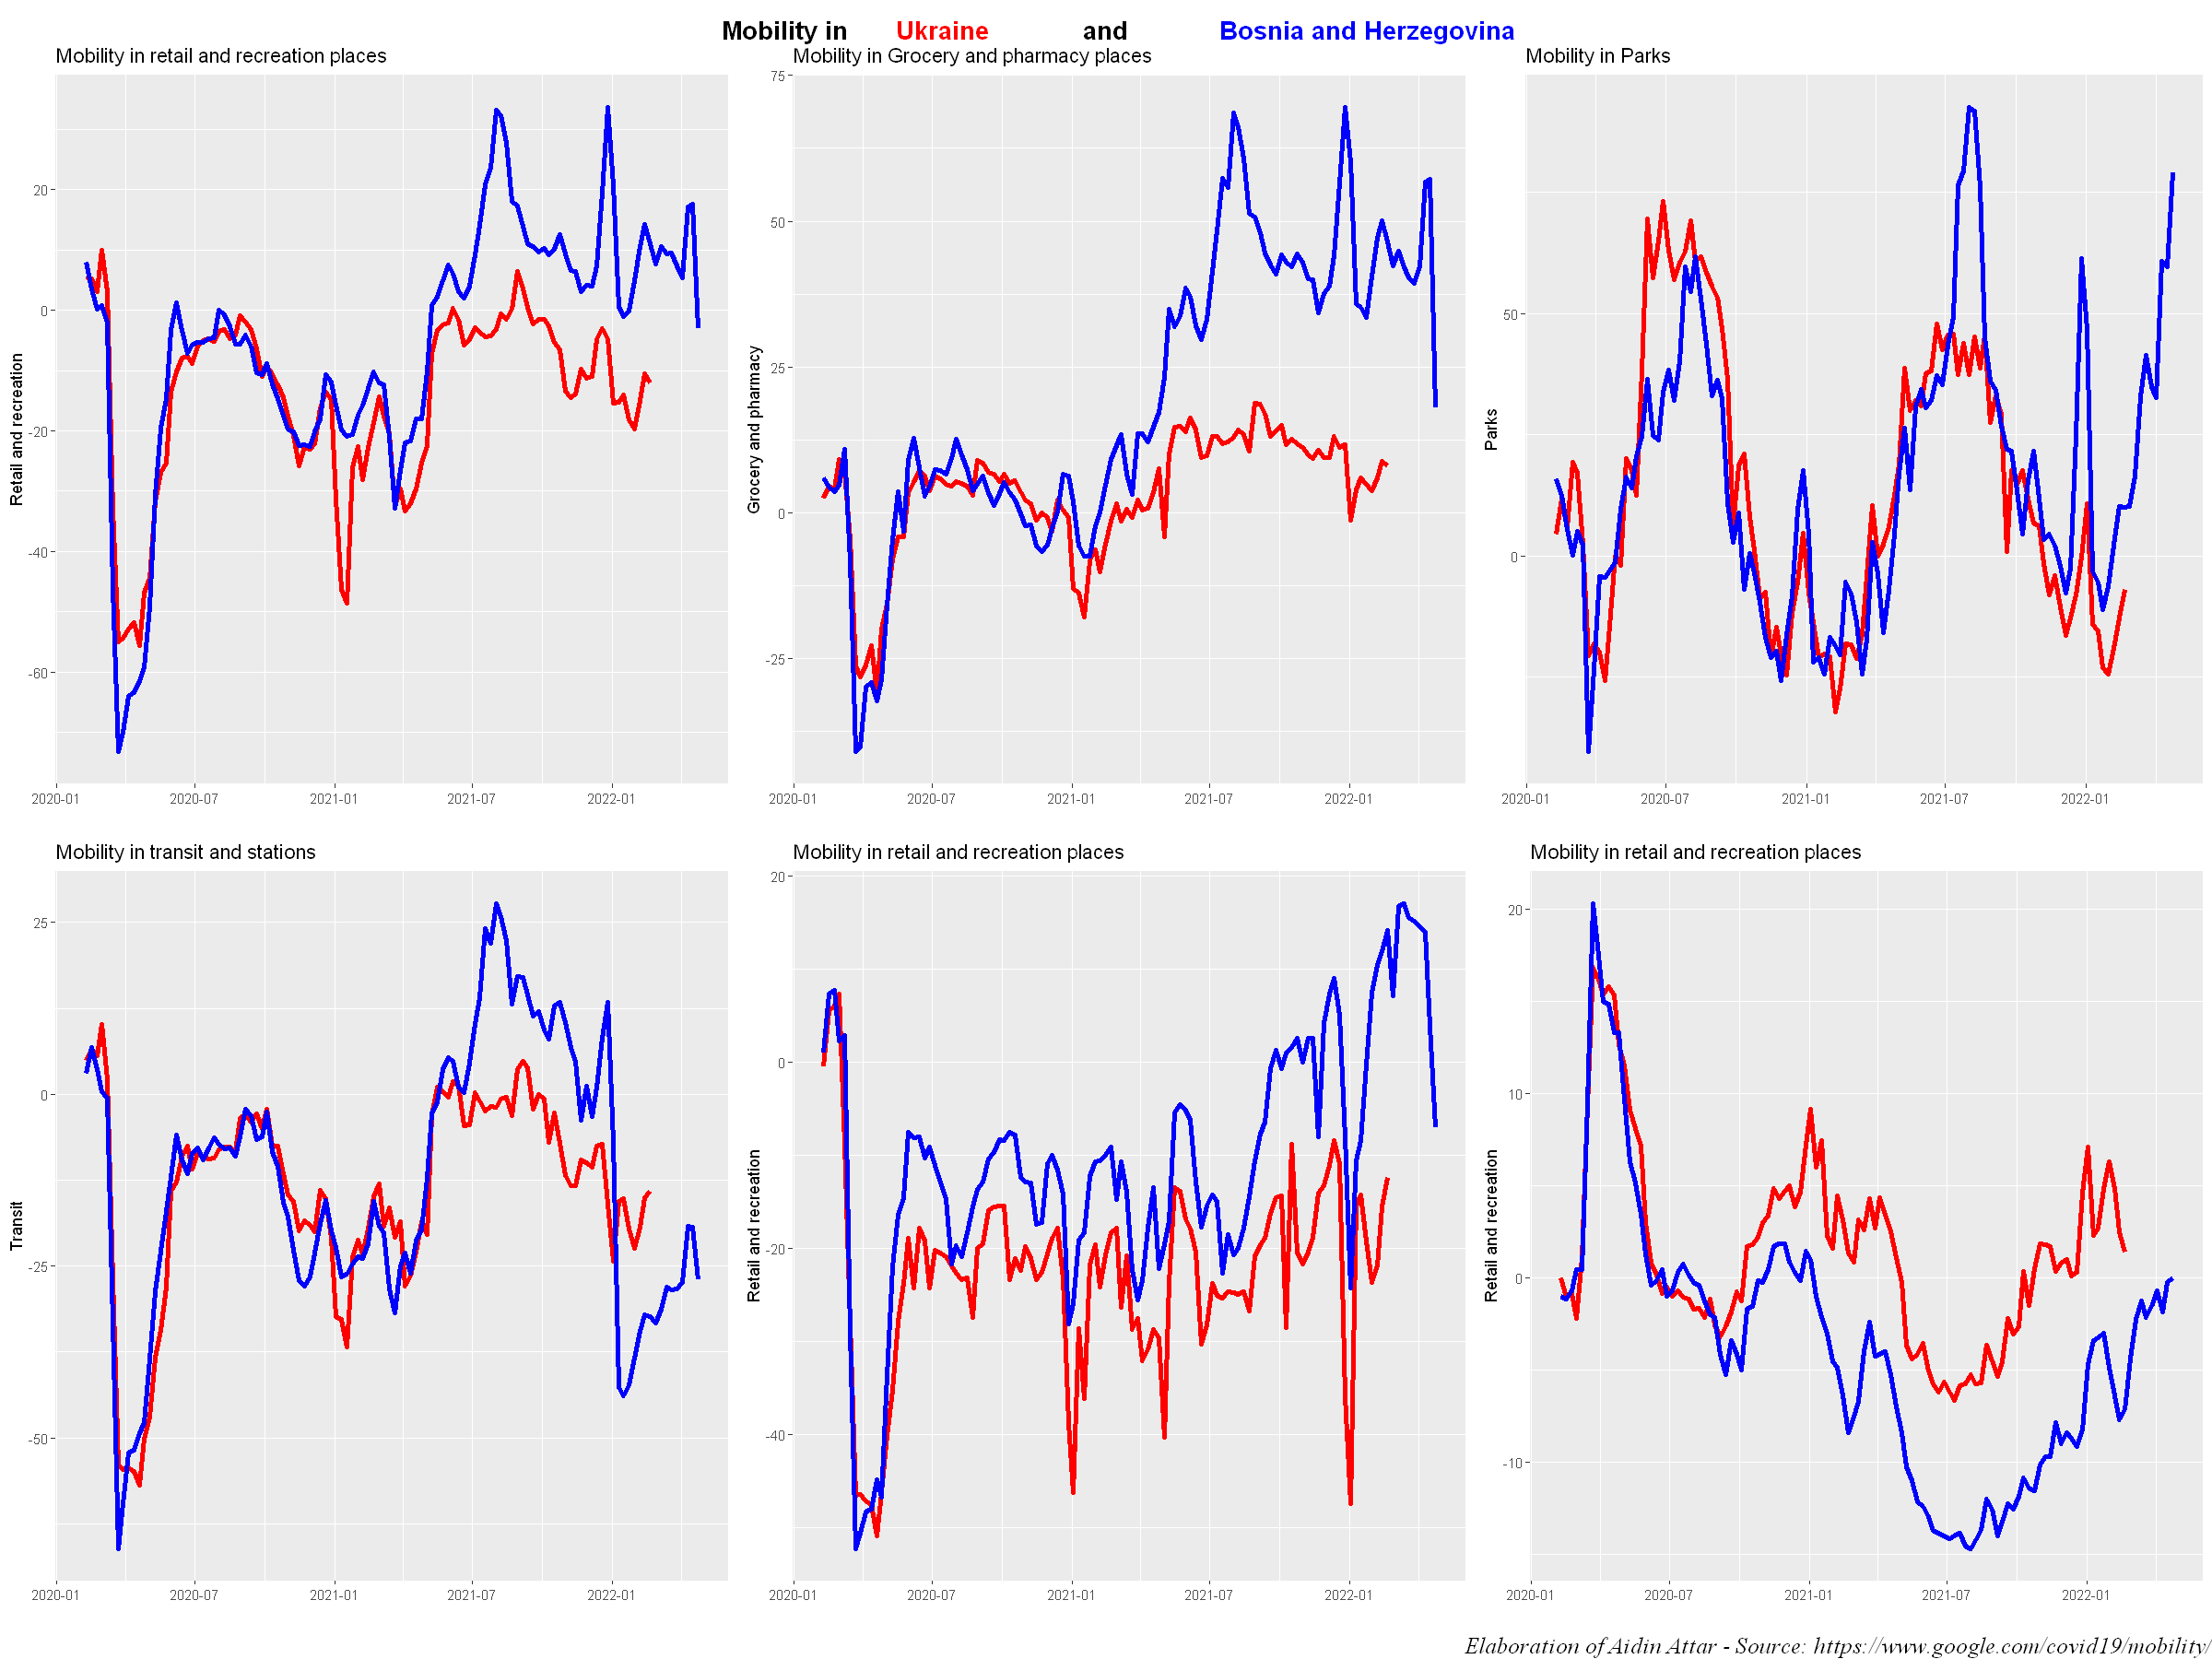

In [6]:
p1 <- ggplot()
p1 <- p1 + geom_line(data = ukraine_week, aes(week, retail_and_recreation_percent_change_from_baseline), color="red",  size=1.5)
p1 <- p1 + geom_line(data = bosnia_week,  aes(week, retail_and_recreation_percent_change_from_baseline), color="blue", size=1.5)
p1 <- p1 + labs(x        = "",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")


p2 <- ggplot()
p2 <- p2 + geom_line(data = ukraine_week, aes(week, grocery_and_pharmacy_percent_change_from_baseline), color="red",  size=1.5)
p2 <- p2 + geom_line(data = bosnia_week,  aes(week, grocery_and_pharmacy_percent_change_from_baseline), color="blue", size=1.5)
p2 <- p2 + labs(x        = "",
                y        = "Grocery and pharmacy",
                title    = "Mobility in Grocery and pharmacy places")


p3 <- ggplot()
p3 <- p3 + geom_line(data = ukraine_week, aes(week, parks_percent_change_from_baseline), color="red",  size=1.5)
p3 <- p3 + geom_line(data = bosnia_week,  aes(week, parks_percent_change_from_baseline), color="blue", size=1.5)
p3 <- p3 + labs(x        = "",
                y        = "Parks",
                title    = "Mobility in Parks")


p4 <- ggplot()
p4 <- p4 + geom_line(data = ukraine_week, aes(week, transit_stations_percent_change_from_baseline), color="red",  size=1.5)
p4 <- p4 + geom_line(data = bosnia_week,  aes(week, transit_stations_percent_change_from_baseline), color="blue", size=1.5)
p4 <- p4 + labs(x        = "",
                y        = "Transit",
                title    = "Mobility in transit and stations")



p5 <- ggplot()
p5 <- p5 + geom_line(data = ukraine_week, aes(week, workplaces_percent_change_from_baseline), color="red",  size=1.5)
p5 <- p5 + geom_line(data = bosnia_week,  aes(week, workplaces_percent_change_from_baseline), color="blue", size=1.5)
p5 <- p5 + labs(x        = "",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")



p6 <- ggplot()
p6 <- p6 + geom_line(data = ukraine_week, aes(week, residential_percent_change_from_baseline), color="red",  size=1.5)
p6 <- p6 + geom_line(data = bosnia_week,  aes(week, residential_percent_change_from_baseline), color="blue", size=1.5)
p6 <- p6 + labs(x        = "",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")

grid.arrange(p1, p2, p3, p4, p5, p6, 
             nrow = 2,
             top=textGrob("", gp = gpar(fontface = 8, fontsize = 25),hjust = 1,x = 1),
             bottom = textGrob("Elaboration of Aidin Attar - Source: https://www.google.com/covid19/mobility/", gp = gpar(fontface = 8, fontsize = 15),hjust = 1,x = 1))

spacing  <- 20
grid.text(0.425, unit(1,"npc") - unit(1,"line"), 
          label=paste("Mobility in ",paste(rep(" ",spacing*2), collapse='')),
          gp=gpar(col="black", fontsize=16,fontface="bold"))
grid.text(0.495, unit(1,"npc") - unit(1,"line"), 
          label=paste("Ukraine",paste(rep(" ",spacing*2), collapse='')),
          gp=gpar(col="red", fontsize=16,fontface="bold"))
grid.text(0.5, unit(1,"npc") - unit(1,"line"), 
          label=paste(paste(rep(" ",spacing), collapse='')," and ",
            paste(rep(" ",spacing), collapse='')),
          gp=gpar(col="black", fontsize=16,fontface="bold"))
grid.text(0.55, unit(1,"npc") - unit(1,"line"), 
          label=paste(paste(rep(" ",spacing*2), collapse=''),"Bosnia and Herzegovina"),
          gp=gpar(col="blue", fontsize=16,fontface="bold"))

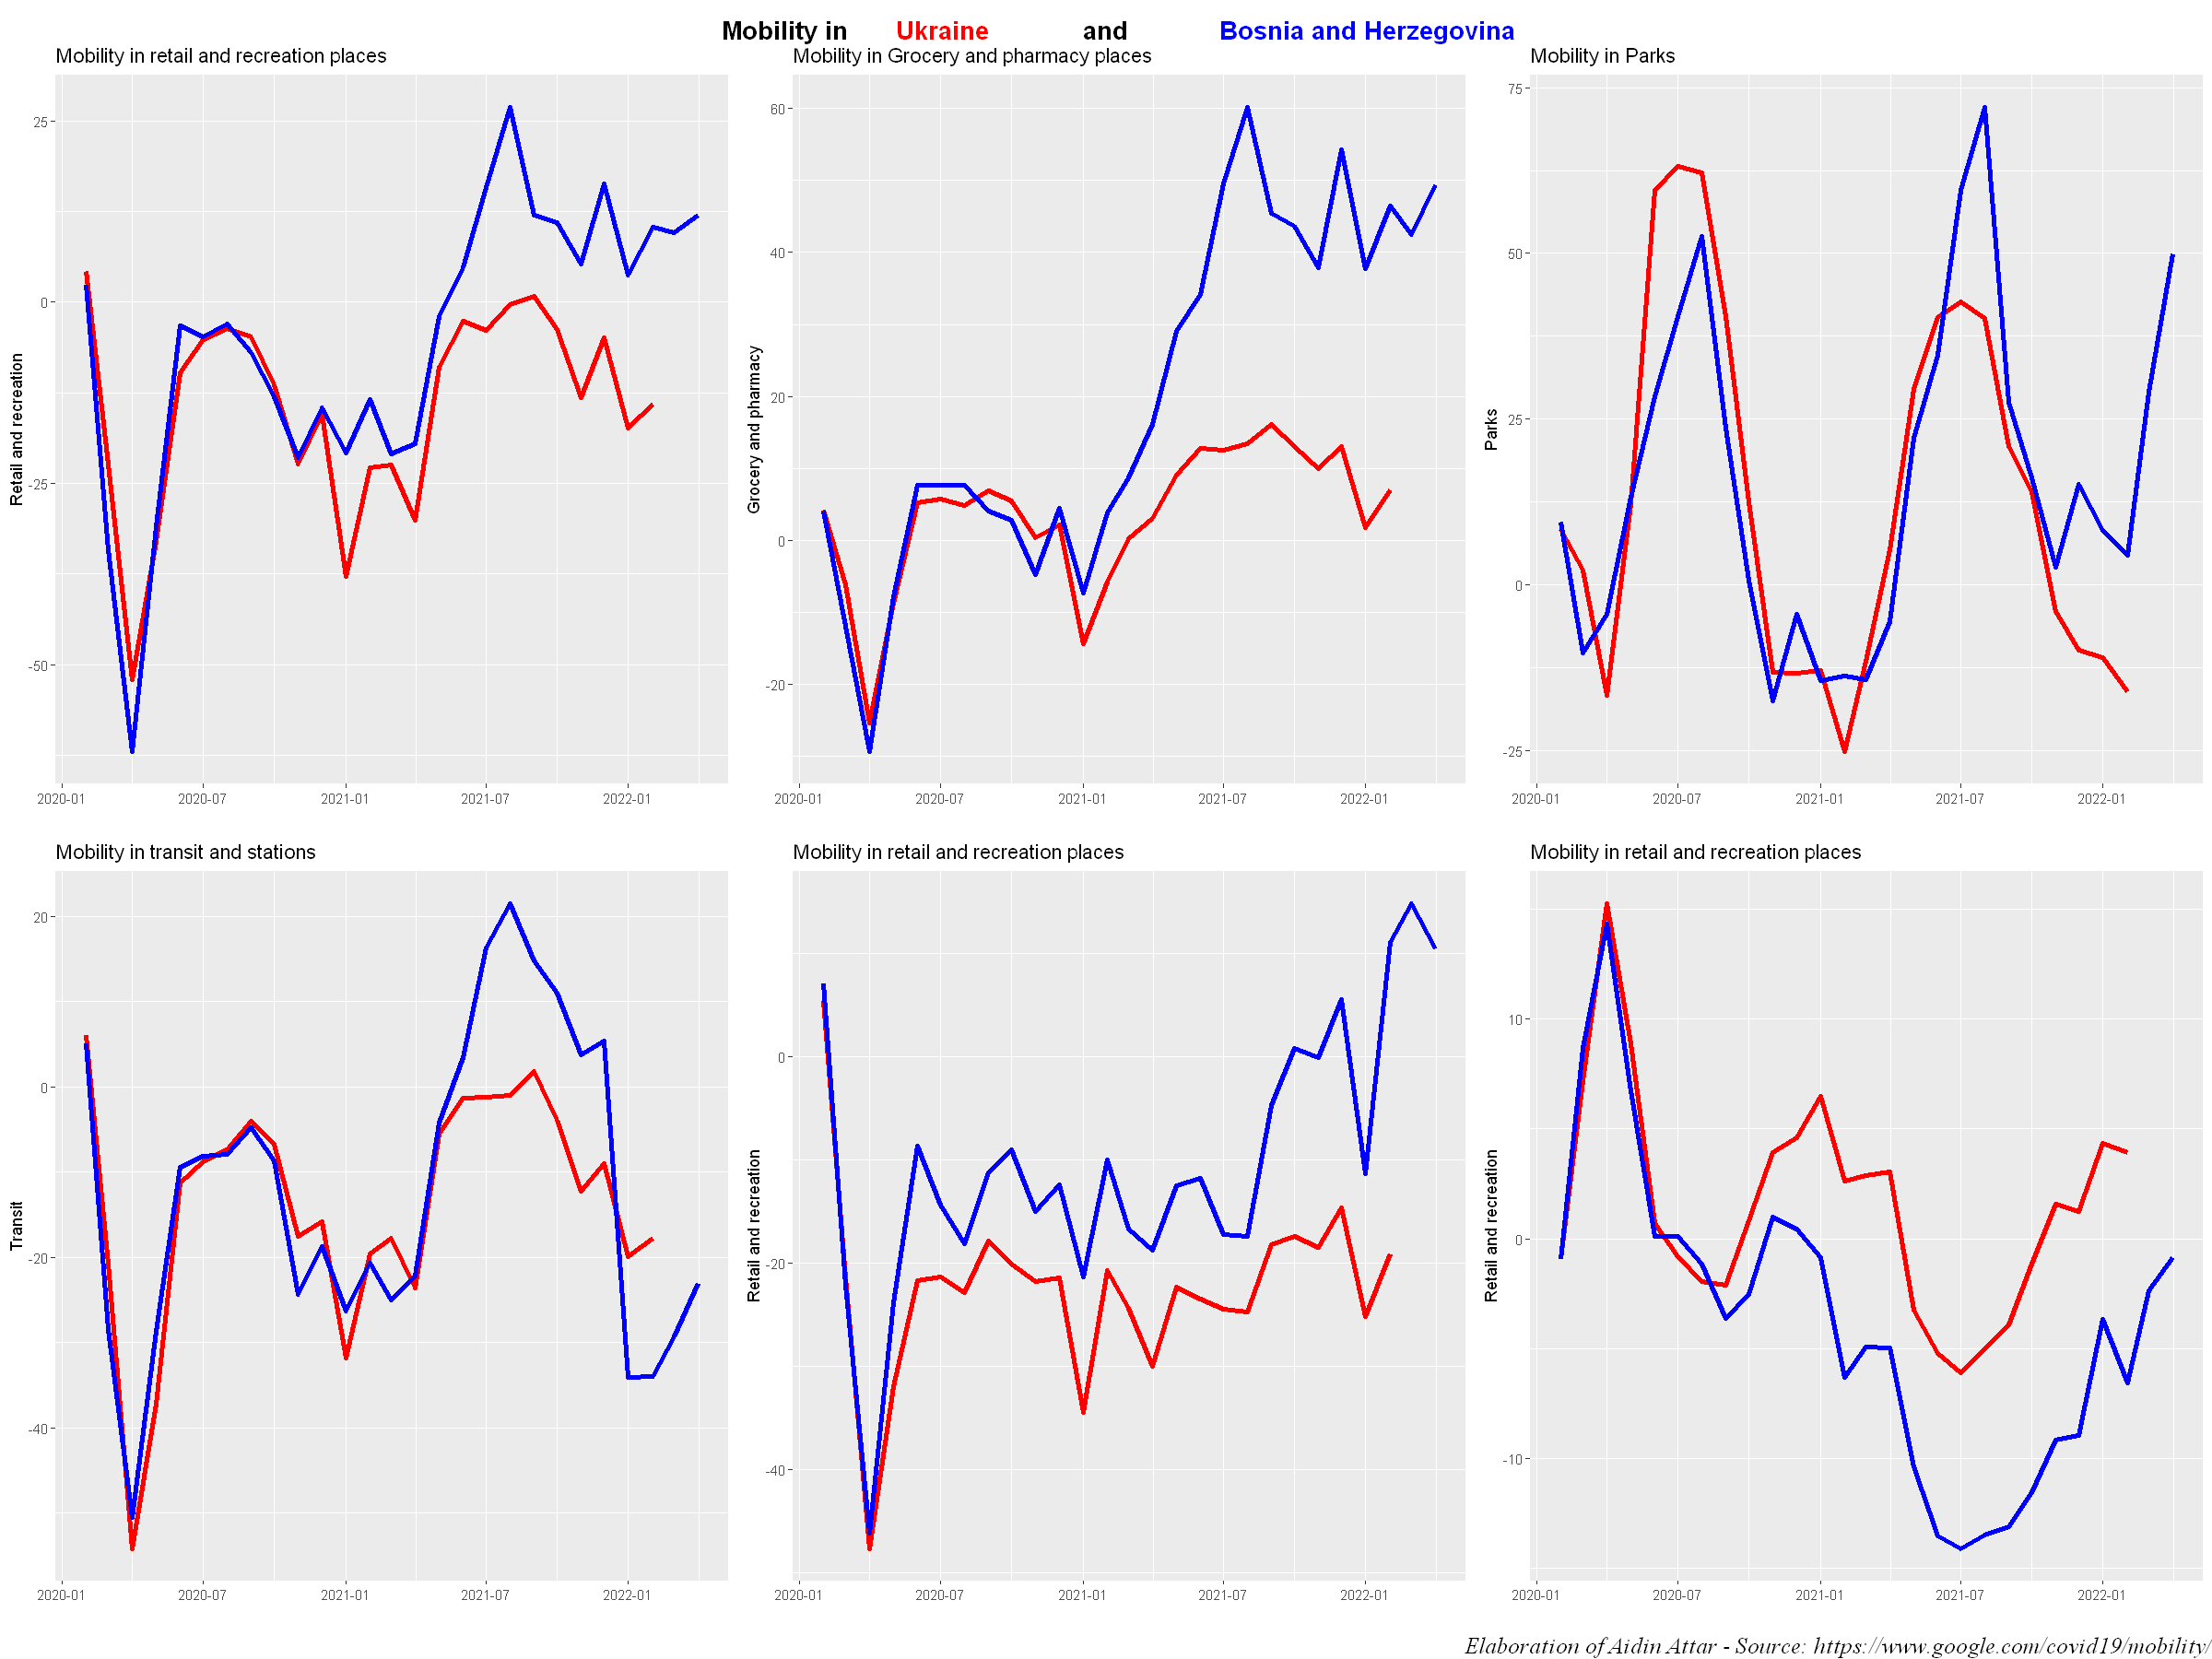

In [7]:
p1 <- ggplot()
p1 <- p1 + geom_line(data = ukraine_month, aes(month, retail_and_recreation_percent_change_from_baseline), color="red",  size=1.5)
p1 <- p1 + geom_line(data = bosnia_month,  aes(month, retail_and_recreation_percent_change_from_baseline), color="blue", size=1.5)
p1 <- p1 + labs(x        = "",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")


p2 <- ggplot()
p2 <- p2 + geom_line(data = ukraine_month, aes(month, grocery_and_pharmacy_percent_change_from_baseline), color="red",  size=1.5)
p2 <- p2 + geom_line(data = bosnia_month,  aes(month, grocery_and_pharmacy_percent_change_from_baseline), color="blue", size=1.5)
p2 <- p2 + labs(x        = "",
                y        = "Grocery and pharmacy",
                title    = "Mobility in Grocery and pharmacy places")


p3 <- ggplot()
p3 <- p3 + geom_line(data = ukraine_month, aes(month, parks_percent_change_from_baseline), color="red",  size=1.5)
p3 <- p3 + geom_line(data = bosnia_month,  aes(month, parks_percent_change_from_baseline), color="blue", size=1.5)
p3 <- p3 + labs(x        = "",
                y        = "Parks",
                title    = "Mobility in Parks")


p4 <- ggplot()
p4 <- p4 + geom_line(data = ukraine_month, aes(month, transit_stations_percent_change_from_baseline), color="red",  size=1.5)
p4 <- p4 + geom_line(data = bosnia_month,  aes(month, transit_stations_percent_change_from_baseline), color="blue", size=1.5)
p4 <- p4 + labs(x        = "",
                y        = "Transit",
                title    = "Mobility in transit and stations")



p5 <- ggplot()
p5 <- p5 + geom_line(data = ukraine_month, aes(month, workplaces_percent_change_from_baseline), color="red",  size=1.5)
p5 <- p5 + geom_line(data = bosnia_month,  aes(month, workplaces_percent_change_from_baseline), color="blue", size=1.5)
p5 <- p5 + labs(x        = "",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")



p6 <- ggplot()
p6 <- p6 + geom_line(data = ukraine_month, aes(month, residential_percent_change_from_baseline), color="red",  size=1.5)
p6 <- p6 + geom_line(data = bosnia_month,  aes(month, residential_percent_change_from_baseline), color="blue", size=1.5)
p6 <- p6 + labs(x        = "",
                y        = "Retail and recreation",
                title    = "Mobility in retail and recreation places")
grid.arrange(p1, p2, p3, p4, p5, p6, 
             nrow = 2,
             top=textGrob("", gp = gpar(fontface = 8, fontsize = 25),hjust = 1,x = 1),
             bottom = textGrob("Elaboration of Aidin Attar - Source: https://www.google.com/covid19/mobility/", gp = gpar(fontface = 8, fontsize = 15),hjust = 1,x = 1))

spacing  <- 20
grid.text(0.425, unit(1,"npc") - unit(1,"line"), 
          label=paste("Mobility in ",paste(rep(" ",spacing*2), collapse='')),
          gp=gpar(col="black", fontsize=16,fontface="bold"))
grid.text(0.495, unit(1,"npc") - unit(1,"line"), 
          label=paste("Ukraine",paste(rep(" ",spacing*2), collapse='')),
          gp=gpar(col="red", fontsize=16,fontface="bold"))
grid.text(0.5, unit(1,"npc") - unit(1,"line"), 
          label=paste(paste(rep(" ",spacing), collapse='')," and ",
            paste(rep(" ",spacing), collapse='')),
          gp=gpar(col="black", fontsize=16,fontface="bold"))
grid.text(0.55, unit(1,"npc") - unit(1,"line"), 
          label=paste(paste(rep(" ",spacing*2), collapse=''),"Bosnia and Herzegovina"),
          gp=gpar(col="blue", fontsize=16,fontface="bold"))

## Exercise 2 - Random Number Generators<a class="anchor" id="ex2"></a>

In [8]:
# numbers generated
N<-1000
numGenerated<-c()

# input of the seed number and conversion to integer
seed_number<-readline(prompt="Enter a four-digit number: \n")
seed_number<-as.integer(seed_number)

number<-seed_number
for (n in 1:N){
    x.squared = number^2
    # convert number to a list of characters
    number <- unlist(strsplit(as.character(x.squared),""))
    
    # remove alternatively first and last character
    i=1
    while(length(number)>4){
        if(i == 1){
            number<-number[-1]
            i = 0
        }
        else{
            number<-number[-length(number)]
            i = 1
        }
    }
    
    # convert again to a number
    number <- as.numeric(paste(number, collapse=""))
    
    # final operations on the number are done to a "temporary"
    # variable, to avoid overwriting it and use it in the next cycle
    tmpNum <- number
    # check if the number has 4 digits 
    # if not add a 0 in the end
    while(tmpNum < 1000){
        tmpNum<-tmpNum*10
    }
    numGenerated<-append(numGenerated,tmpNum)
}
numGenerated

Enter a four-digit number: 
1234


[1] 2275 7562 1838 7824 2149 1820 1240 3760 1376 9337 1795 2202 4880 8144
  [15] 3247 5430 4849 5128 2963 7936 9800 4000 6000 6000 3600 1296 7961 3775
  [29] 2506 8003 4800 3040 4160 3056 3913 3115 3220 3680 3542 5457 7788 6529
  [43] 6278 4132 7340 3875 1560 4336 8008 1280 3840 7456 5919 3450 1902 1760
  [57] 9760 2576 3577 7949 1866 8195 1580 9640 9296 4156 2723 1472 6678 5956
  [71] 4739 4581 9855 1210 6410 8810 7616 3400 1156 3633 1986 4419 5275 8256
  [85] 1615 8220 7568 2746 4051 4106 8592 8224 6341 2082 3472 5470 9920 4064
  [99] 5160 6256 1375 9062 1198 3520 3904 2412 1774 4707 1558 2736 8569 4277
 [113] 2927 6732 3198 2272 6198 4152 2391 1688 4934 3443 8542 9657 2576 3577
 [127] 7949 1866 8195 1580 9640 9296 4156 2723 1472 6678 5956 4739 4581 9855
 [141] 1210 6410 8810 7616 3400 1156 3633 1986 4419 5275 8256 1615 8220 7568
 [155] 2746 4051 4106 8592 8224 6341 2082 3472 5470 9920 4064 5160 6256 1375
 [169] 9062 1198 3520 3904 2412 1774 4707 1558 2736 8569 4277 2927 6732 3198
 [183] 2272 6198 4152 2391 1688 4934 3443 8542 9657 2576 3577 7949 1866 8195
 [197] 1580 9640 9296 4156 2723 1472 6678 5956 4739 4581 9855 1210 6410 8810
 [211] 7616 3400 1156 3633 1986 4419 5275 8256 1615 8220 7568 2746 4051 4106
 [225] 8592 8224 6341 2082 3472 5470 9920 4064 5160 6256 1375 9062 1198 3520
 [239] 3904 2412 1774 4707 1558 2736 8569 4277 2927 6732 3198 2272 6198 4152
 [253] 2391 1688 4934 3443 8542 9657 2576 3577 7949 1866 8195 1580 9640 9296
 [267] 4156 2723 1472 6678 5956 4739 4581 9855 1210 6410 8810 7616 3400 1156
 [281] 3633 1986 4419 5275 8256 1615 8220 7568 2746 4051 4106 8592 8224 6341
 [295] 2082 3472 5470 9920 4064 5160 6256 1375 9062 1198 3520 3904 2412 1774
 [309] 4707 1558 2736 8569 4277 2927 6732 3198 2272 6198 4152 2391 1688 4934
 [323] 3443 8542 9657 2576 3577 7949 1866 8195 1580 9640 9296 4156 2723 1472
 [337] 6678 5956 4739 4581 9855 1210 6410 8810 7616 3400 1156 3633 1986 4419
 [351] 5275 8256 1615 8220 7568 2746 4051 4106 8592 8224 6341 2082 3472 5470
 [365] 9920 4064 5160 6256 1375 9062 1198 3520 3904 2412 1774 4707 1558 2736
 [379] 8569 4277 2927 6732 3198 2272 6198 4152 2391 1688 4934 3443 8542 9657
 [393] 2576 3577 7949 1866 8195 1580 9640 9296 4156 2723 1472 6678 5956 4739
 [407] 4581 9855 1210 6410 8810 7616 3400 1156 3633 1986 4419 5275 8256 1615
 [421] 8220 7568 2746 4051 4106 8592 8224 6341 2082 3472 5470 9920 4064 5160
 [435] 6256 1375 9062 1198 3520 3904 2412 1774 4707 1558 2736 8569 4277 2927
 [449] 6732 3198 2272 6198 4152 2391 1688 4934 3443 8542 9657 2576 3577 7949
 [463] 1866 8195 1580 9640 9296 4156 2723 1472 6678 5956 4739 4581 9855 1210
 [477] 6410 8810 7616 3400 1156 3633 1986 4419 5275 8256 1615 8220 7568 2746
 [491] 4051 4106 8592 8224 6341 2082 3472 5470 9920 4064 5160 6256 1375 9062
 [505] 1198 3520 3904 2412 1774 4707 1558 2736 8569 4277 2927 6732 3198 2272
 [519] 6198 4152 2391 1688 4934 3443 8542 9657 2576 3577 7949 1866 8195 1580
 [533] 9640 9296 4156 2723 1472 6678 5956 4739 4581 9855 1210 6410 8810 7616
 [547] 3400 1156 3633 1986 4419 5275 8256 1615 8220 7568 2746 4051 4106 8592
 [561] 8224 6341 2082 3472 5470 9920 4064 5160 6256 1375 9062 1198 3520 3904
 [575] 2412 1774 4707 1558 2736 8569 4277 2927 6732 3198 2272 6198 4152 2391
 [589] 1688 4934 3443 8542 9657 2576 3577 7949 1866 8195 1580 9640 9296 4156
 [603] 2723 1472 6678 5956 4739 4581 9855 1210 6410 8810 7616 3400 1156 3633
 [617] 1986 4419 5275 8256 1615 8220 7568 2746 4051 4106 8592 8224 6341 2082
 [631] 3472 5470 9920 4064 5160 6256 1375 9062 1198 3520 3904 2412 1774 4707
 [645] 1558 2736 8569 4277 2927 6732 3198 2272 6198 4152 2391 1688 4934 3443
 [659] 8542 9657 2576 3577 7949 1866 8195 1580 9640 9296 4156 2723 1472 6678
 [673] 5956 4739 4581 9855 1210 6410 8810 7616 3400 1156 3633 1986 4419 5275
 [687] 8256 1615 8220 7568 2746 4051 4106 8592 8224 6341 2082 3472 5470 9920
 [701] 4064 5160 6256 1375 9062 1198 3520 3904 2412 1774 4707 1558 2736 8569
 [715] 4277 2927 6732 3198 2272 6198 4152 2391 1688 4934 3443 8542 9657 2576

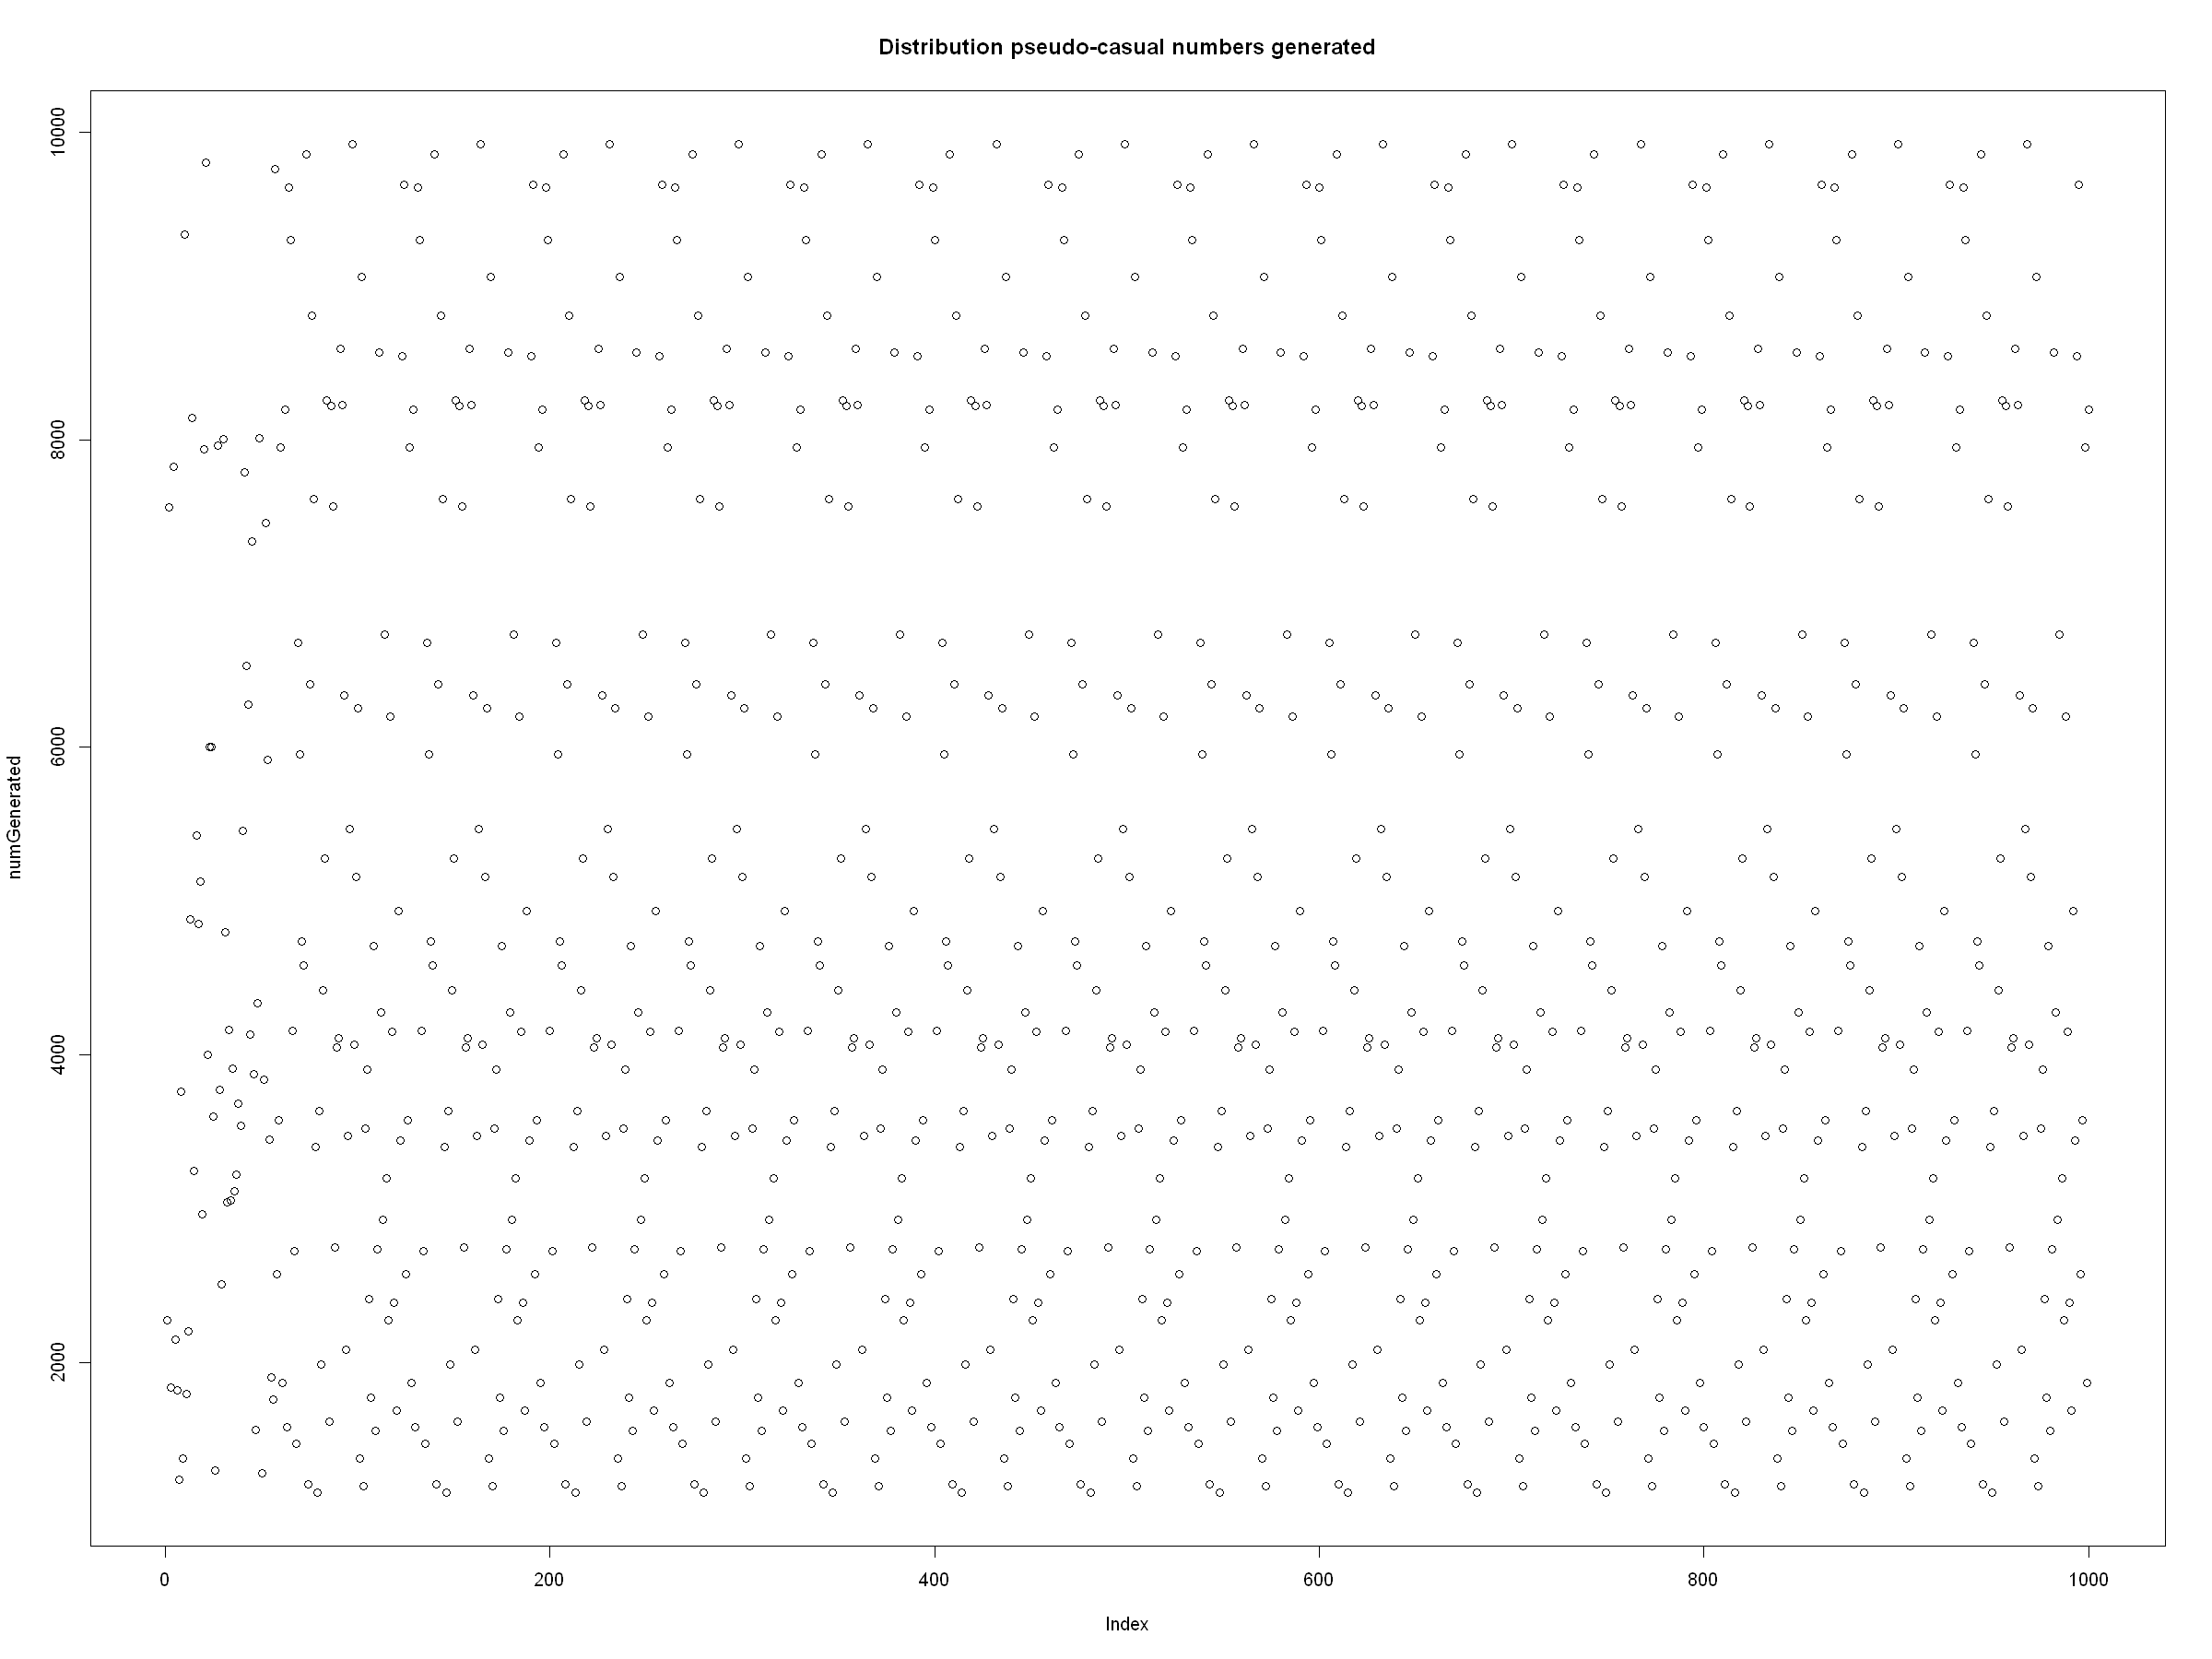

In [9]:
plot(numGenerated, main="Distribution pseudo-casual numbers generated")

One can see a pattern in the generated values, making the algorithm be not very good.

## Bayesian Inference - Part 1<a class="anchor" id="ex3"></a>

We assume a binomial distribution for $\mathbf{y}$

The appropriate likelihood is the binomial distribution of N trials and y success.

On the other hand, since we don't have any clue about how the people see the last issues in the journal we assume a uniform prior distribution.

Adopting an uniform prior the proserior will be simply proportional to the likelihood, i.e. the likelihood multiplied by a constant function and a normalization factor (which will be considered together as a single normalization factor).

In [10]:
N<-150
y<-29
p<-seq(0,1,.001)

likelihood<-dbinom(x=y, prob=p, size=N)
prior<-dunif(x=p)

# define the function to integrate
post_int<-function(x){
    return(dbinom(x=y, prob=x, size=N))
}
normalization<-integrate(post_int, lower=0, upper=1)$value
posterior<-likelihood/(normalization)

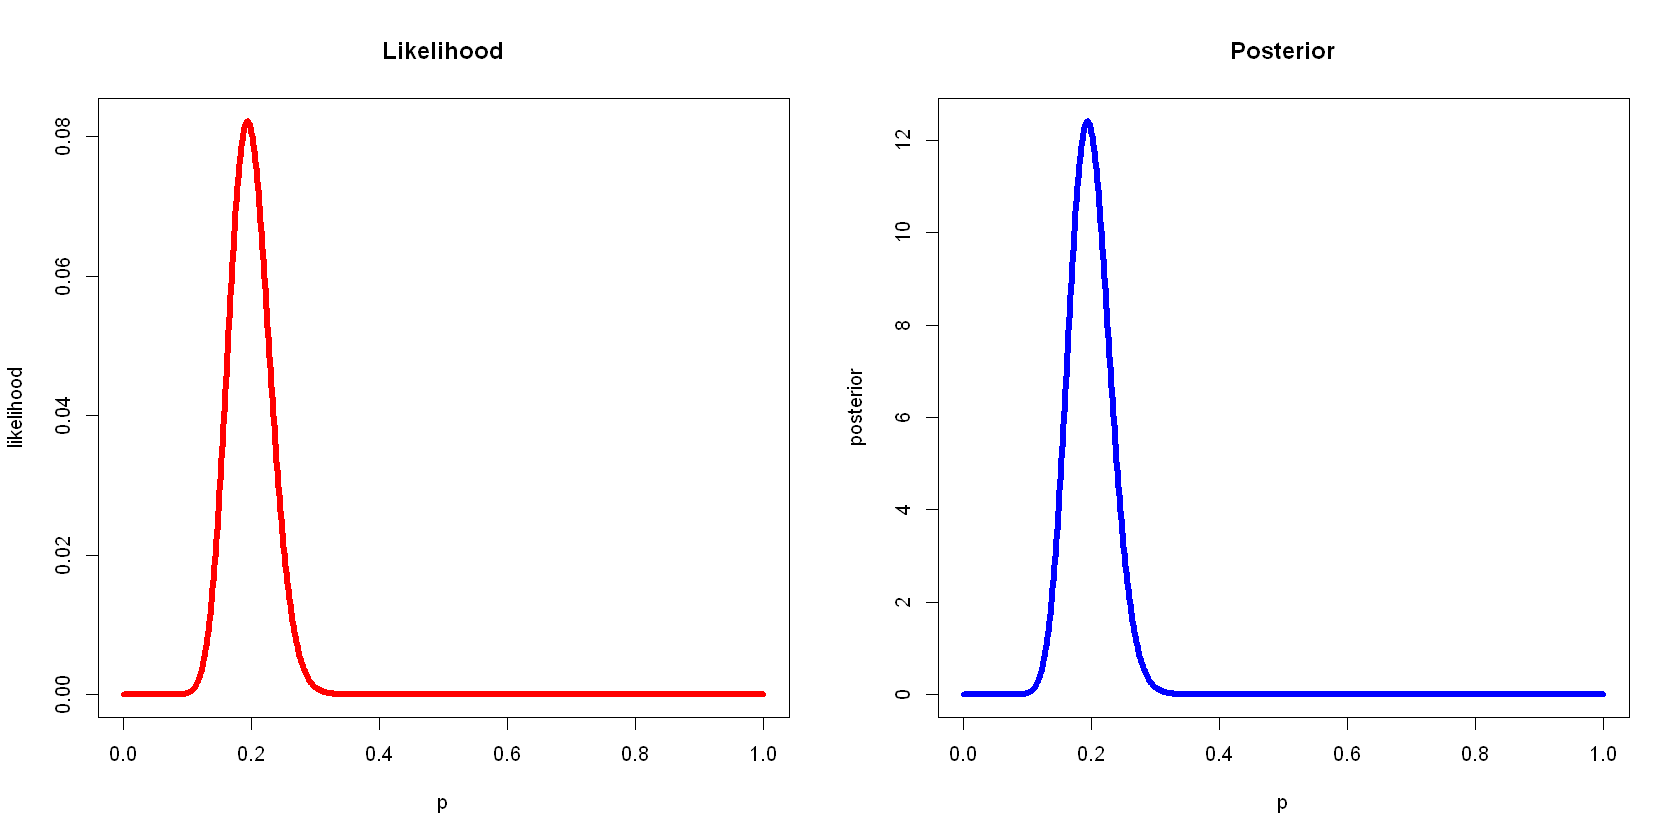

In [11]:
options(repr.plot.width = 14, repr.plot.height = 7)
par(mfrow = c(1,2))
plot(p,likelihood, type="l", main="Likelihood", lwd=5, col="red")
plot(p,posterior,  type="l", main="Posterior",  lwd=5, col="blue")

## Bayesian Inference - Part 2<a class="anchor" id="ex4"></a>

In [12]:
n <- 30
n.sample<-2000
delta.p<-1/n.sample

outcome <- c("T", "T", "T", "T", "T", "H", 
             "T", "T", "H", "H", "T", "T", 
             "H", "H", "H", "T", "H", "T", 
             "H", "T", "H", "H", "T", "H", 
             "T", "H", "T", "H", "H", "H")

nT<-length(outcome[outcome=="T"])
nH<-n-nT
p<-seq(0,1,length.out=n.sample)

# as before the likelihood is a binomial distribution with n trials and nT successes
likelihood<-dbinom(x=nT, size=n, prob=p)

### Uniform Prior

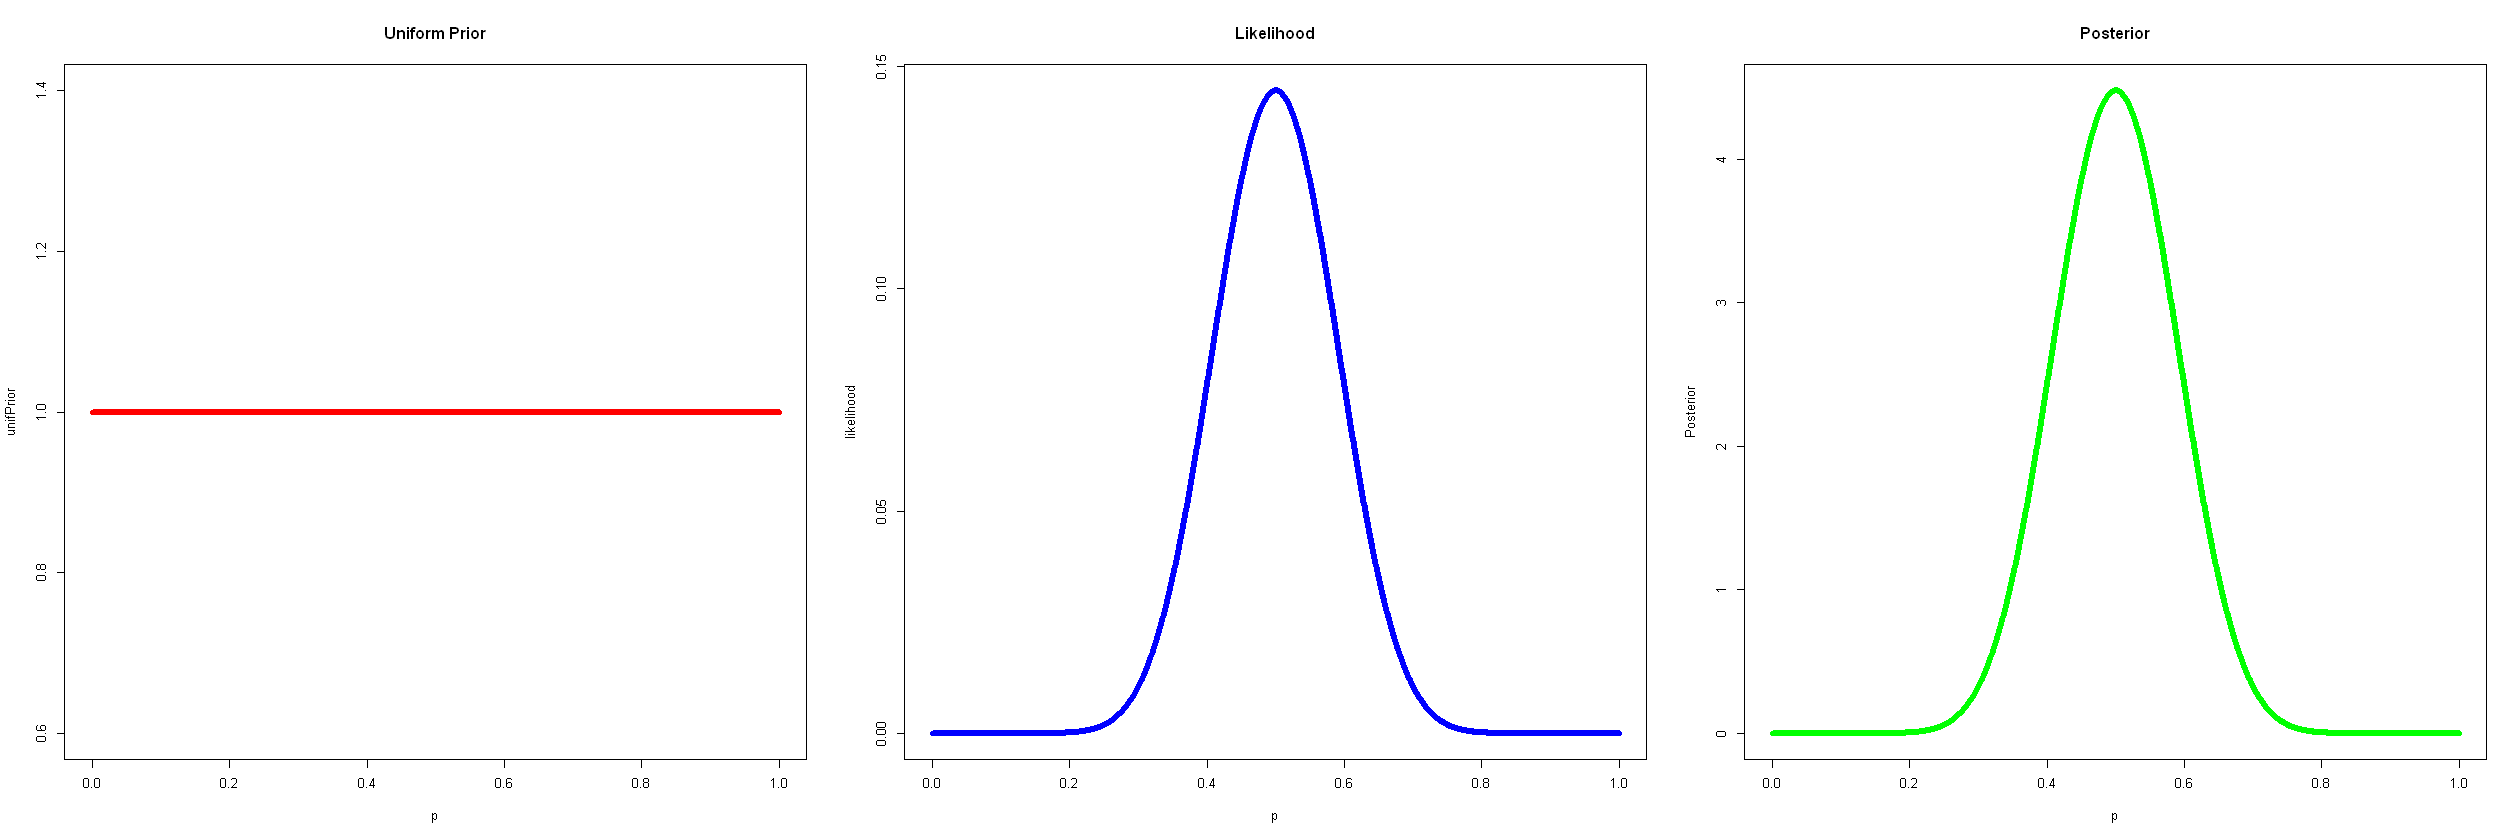

In [13]:
unifPrior<-dunif(p)

# define the function to integrate
post_int<-function(p){
    return(dbinom(x=nT, prob=p, size=n))
}
normalization<-integrate(post_int, lower=0, upper=1)$value
Posterior<-likelihood/(normalization)

options(repr.plot.width = 21, repr.plot.height = 7)
par(mfrow = c(1,3))
plot(p,unifPrior,  type="l", main="Uniform Prior", lwd=5, col='red'  )
plot(p,likelihood, type="l", main="Likelihood",    lwd=5, col='blue' )
plot(p,Posterior,  type="l", main="Posterior",     lwd=5, col='green')

#### Estimation of the most probable value

In [14]:
#best<-delta.p*sum(Posterior*p)
best<-p[which.max(Posterior)]

m = seq(0.0001,1,0.001)
prob_unif = 0
i = 1
while(prob_unif < 0.95){
    i <- i+1
    prob_unif <- integrate(post_int, lower = best-m[i], upper = best+m[i])$value/normalization
}

cat("Best estiamtion: \t\t", best, "\n95% CI for Uniform Prior:\t [", best-m[i], ", ", best+m[i], "]")

Best estiamtion: 		 0.4997499 
95% CI for Uniform Prior:	 [ 0.3296499 ,  0.6698499 ]

### Beta prior

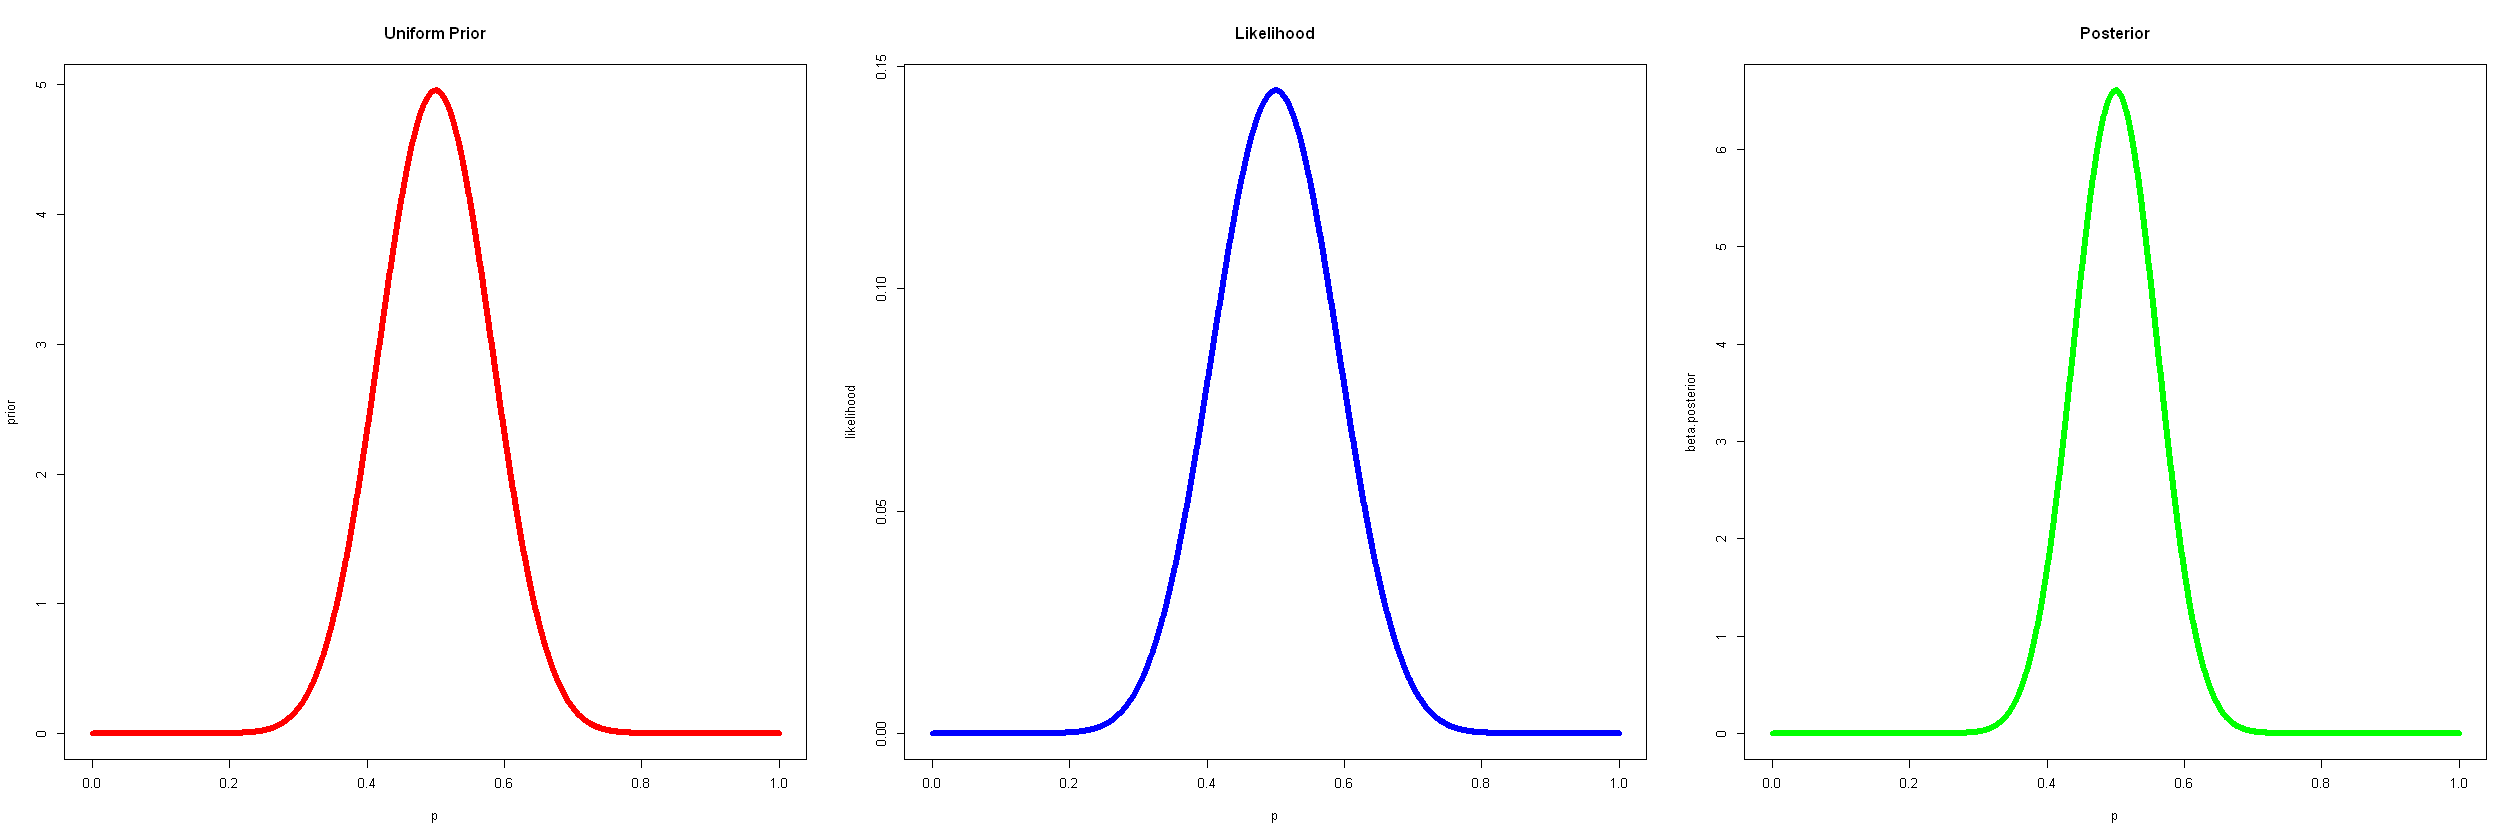

In [15]:
mean       <-.5
std        <-.08
sample_size<-mean*(1-mean)/std^2

alpha.prior<-mean*sample_size
beta.prior <-(1-mean)*sample_size

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
beta.posterior<-dbeta(p, alpha.prior+nT, beta.prior-nT+n)

options(repr.plot.width = 21, repr.plot.height = 7)
par(mfrow = c(1,3))
plot(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )
plot(p,likelihood,     type="l", main="Likelihood",    lwd=5, col='blue' )
plot(p,beta.posterior, type="l", main="Posterior",     lwd=5, col='green')

In [16]:
post_beta<-function(x){
    #cat(length(dbeta(x, alpha.prior+nT, beta.prior-nT+n)))
    return(dbeta(x, alpha.prior+nT, beta.prior-nT+n))
}

#best<-delta.p*sum(beta.posterior*p)
best<-p[which.max(beta.posterior)]

m = seq(0.0001,1,0.001)
prob_beta = 0
i = 1
while(prob_beta < 0.95){
    i <- i+1
    prob_beta <- integrate(post_beta, lower = best-m[i], upper = best+m[i])$value
}

cat("Best estiamtion: \t\t", best, "\n95% CI for Uniform Prior:\t [", best-m[i], ", ", best+m[i], "]")

Best estiamtion: 		 0.4997499 
95% CI for Uniform Prior:	 [ 0.3826499 ,  0.6168499 ]

### Sequential analysis

In [17]:
# use the fact that the uniform distribution can
# be defined as a beta distribution to avoid making
# two different functions
sequential<-function(coin, alpha, beta){
    bin <- ifelse(coin == 'T', 1, 0)
    
    best  <- c()
    left  <- c()
    right <- c()
    
    Prior <- rep(paste('Prior: alpha =', toString(alpha), 'beta =',toString(beta)), length(coin))
    for(i in bin){
        # conjugate priors rule
        alpha<-alpha+i
        beta <-beta+(1-i)
        best <- append(best, (alpha-1)/(alpha+beta-2))
        
        left <-append(left,  qbeta(0.025, shape1 = alpha, shape2 = beta))
        right<-append(right, qbeta(0.975, shape1 = alpha, shape2 = beta))
    }
    n <- seq(length(bin))
    
    return(data.frame(n, coin, best, left, right, Prior))
}

In [18]:
alpha <- 1
beta  <- 1
data_unif <- sequential(outcome, alpha, beta)
tail(data_unif,1)

,n,coin,best,left,right,Prior
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
30,30,H,0.5,0.330606,0.669394,Prior: alpha = 1 beta = 1


In [19]:
data_beta <- sequential(outcome, alpha.prior, beta.prior)
tail(data_beta,1)

,n,coin,best,left,right,Prior
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
30,30,H,0.5,0.3832902,0.6167098,Prior: alpha = 19.53125 beta = 19.53125


The results are the same for the sequential analysis, for both the distribution as for the one-step analysis, considering all the data as a whole.

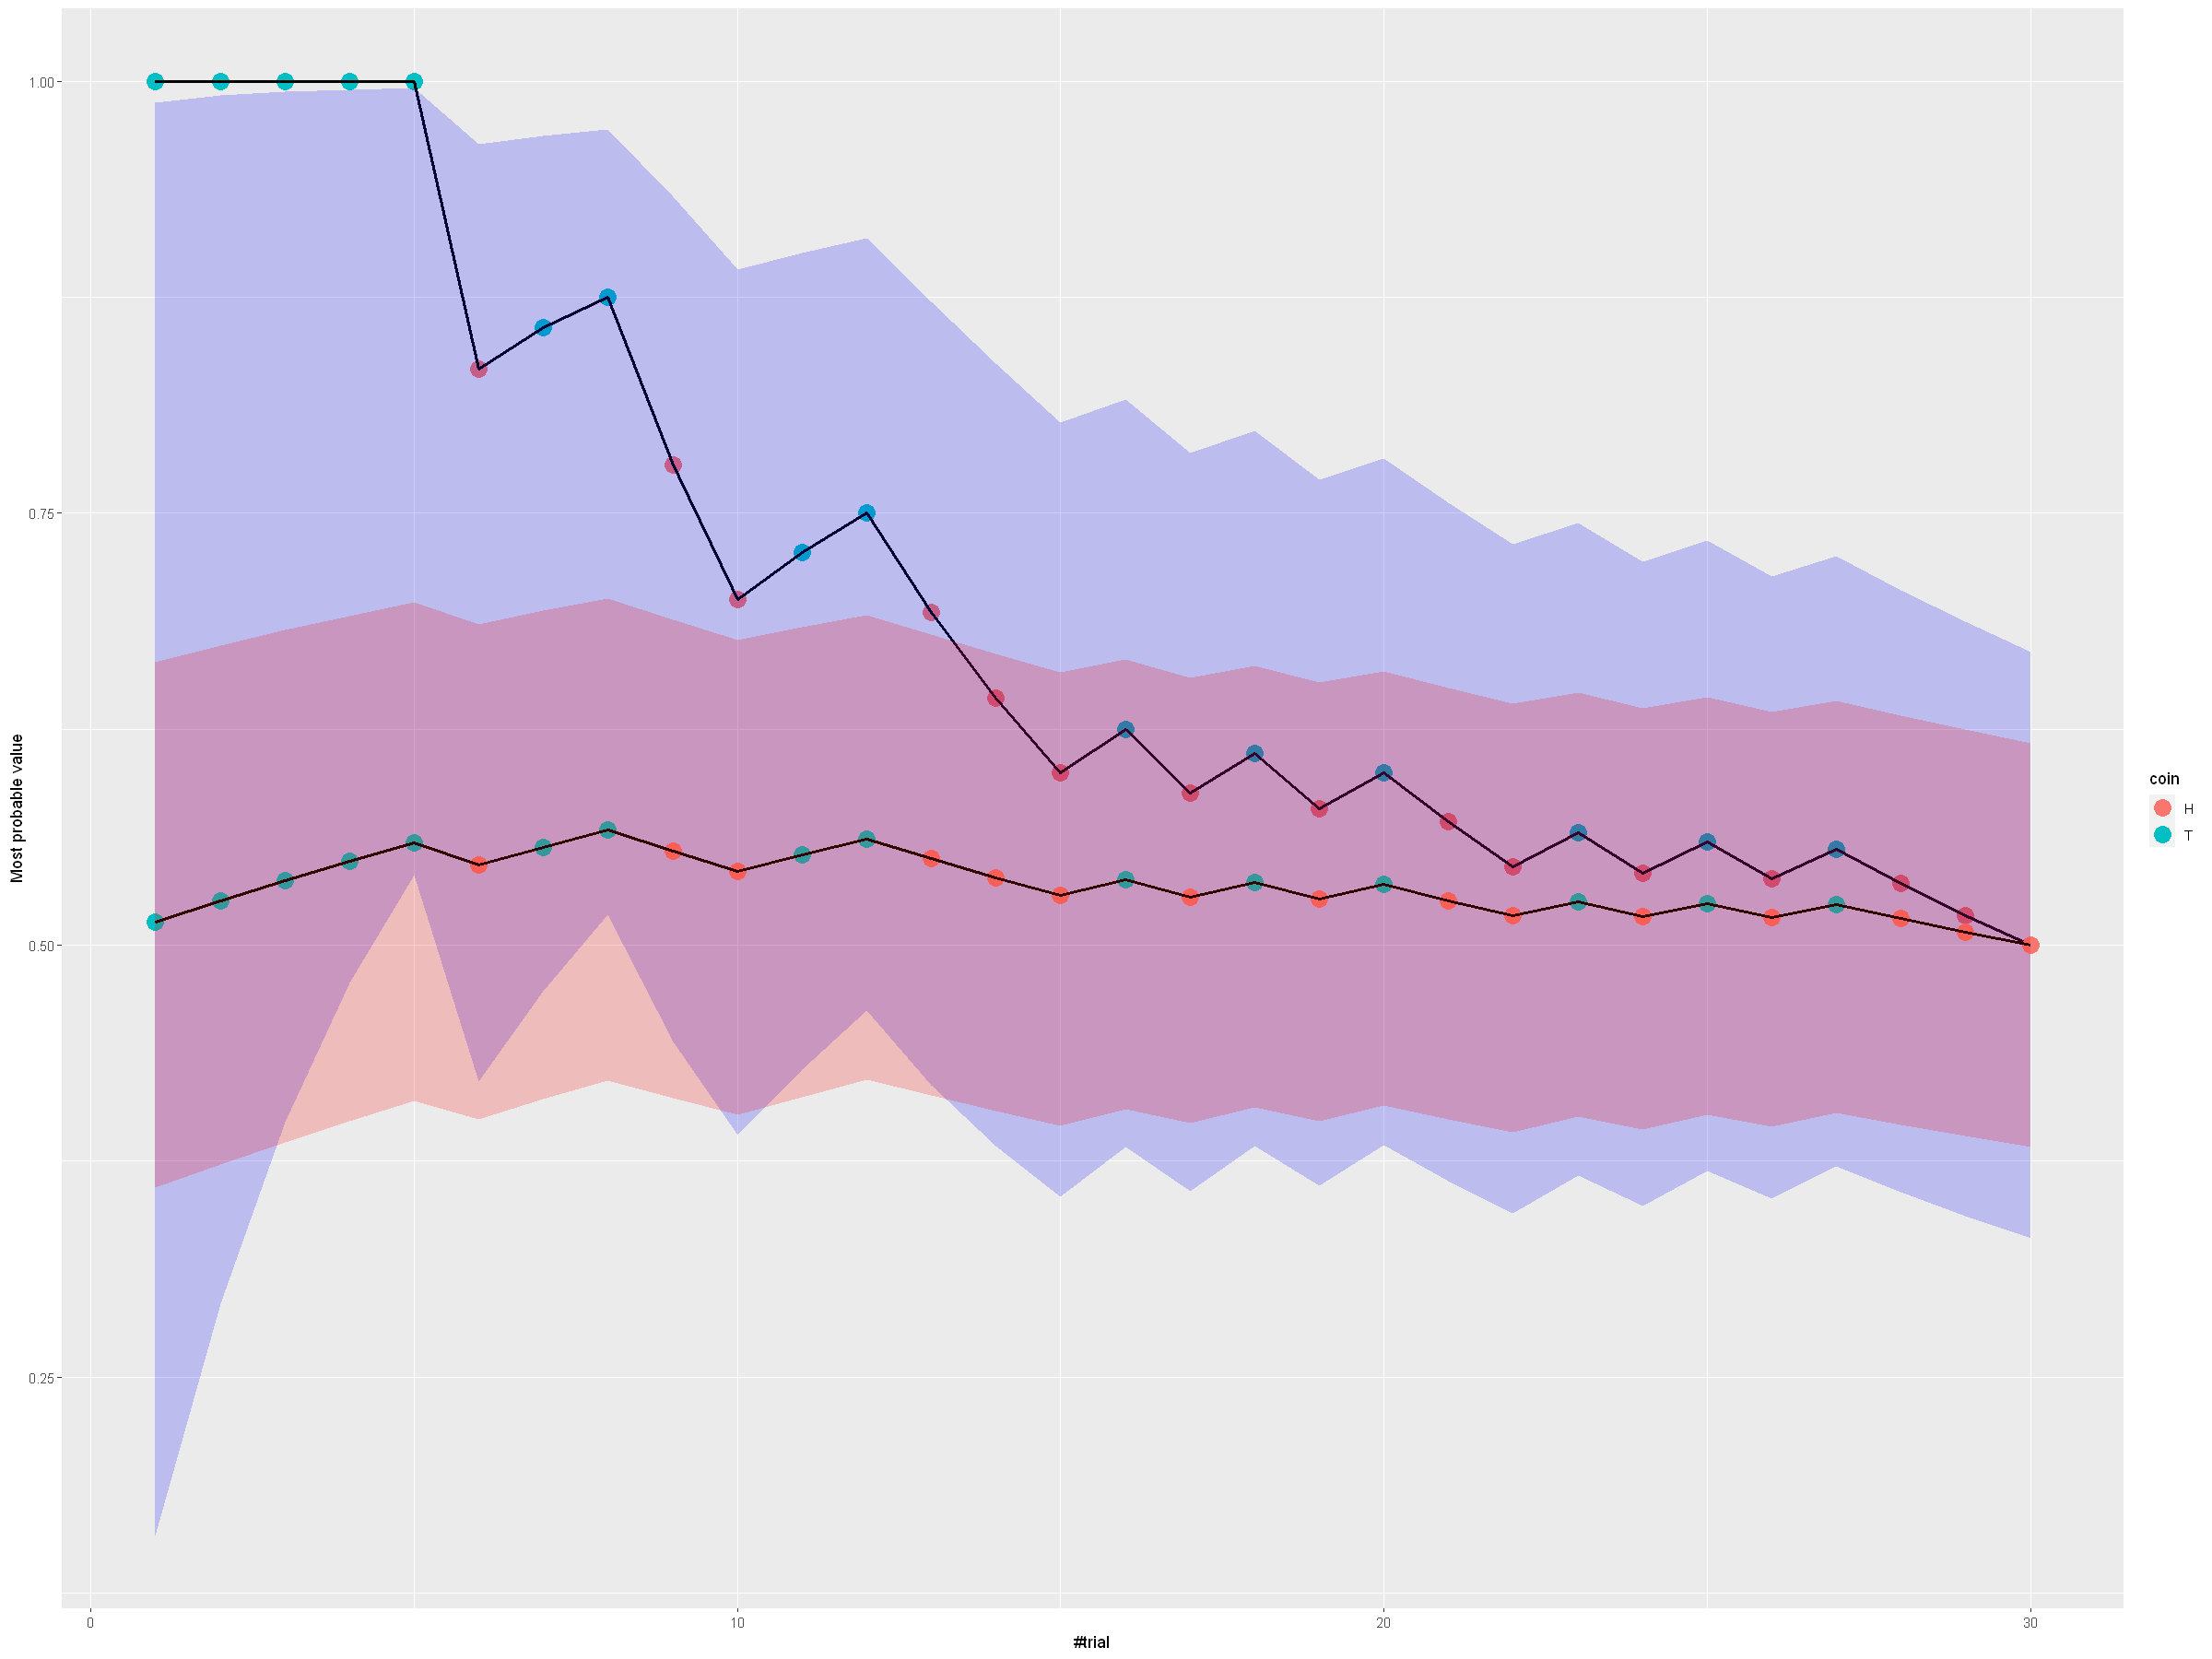

In [24]:
options(repr.plot.width=20, repr.plot.height=15)
p<-ggplot()
p<-p+geom_point(data=data_unif,  aes(n, best, col=coin), size=5)+
     geom_line( data=data_unif,  aes(n, best),           size=1)+
     geom_ribbon(data=data_unif, aes(n, best, ymin=left, ymax=right), fill="blue", alpha=0.2)
p<-p+geom_point(data=data_beta,  aes(n, best, col=coin), size=5)+
     geom_line( data=data_beta,  aes(n, best),           size=1)+
     geom_ribbon(data=data_beta, aes(n, best, ymin=left, ymax=right), fill="red",  alpha=0.2)
p<-p+labs(x="#trial",
          y="Most probable value")
p